# <strong> Creating a dataset </strong>

In [1]:
import pandas as pd
import numpy as np

# Set a random seed for reproducibility
np.random.seed(42)

data = {
    'A': np.random.normal(loc=0.5, scale=0.1, size=100),  # Normal distribution with mean=0.5 and std=0.1
    'B': np.random.normal(loc=5, scale=1, size=100).astype(int),  # Normal distribution, mean=5, std=1, converted to integers
    'C': np.random.normal(loc=50, scale=10, size=100).astype(int),  # Normal distribution, mean=50, std=10
    'D': np.random.normal(loc=500, scale=50, size=100).astype(int),  # Normal distribution, mean=500, std=50
    'E': np.random.normal(loc=5000, scale=500, size=100).astype(int),  # Normal distribution, mean=5000, std=500
    'F': np.random.choice(['Low', 'Medium', 'High'], size=100, p=[0.3, 0.5, 0.2]),  # Ordinal variable
    'G': np.random.choice(['Red', 'Blue', 'Green', 'Yellow'], size=100),  # Nominal variable
    'H': np.random.choice(['Heads', 'Tails'], size=100, p=[0.5, 0.5]),  # Ordinal variable

}

df = pd.DataFrame(data)

# Ensure ordinal category is in logical order
df['F'] = pd.Categorical(df['F'], categories=['Low', 'Medium', 'High'], ordered=True)

df.head(5)


,A,B,C,D,E,F,G,H
0,0.549671,3,53,458,4202,Medium,Green,Heads
1,0.486174,4,55,471,4700,Medium,Green,Heads
2,0.564769,4,60,537,5002,Medium,Yellow,Tails
3,0.652303,4,60,530,5023,High,Red,Tails
4,0.476585,4,36,498,4774,Medium,Blue,Heads


# <strong> Basic Terms </strong>

## Arithmetic Mean

$$
\bar{x} = \frac{\sum x_i}{n}
$$

The arithmetic mean is shown to be the sum of all elements in the dataset, divided by the total number of elements in the dataset.

In [2]:
print(np.mean(df['A']))
print(np.mean(df['B']))
print(np.mean(df['C']))
print(np.mean(df['D']))
print(np.mean(df['E']))

0.4896153482605905
4.54
50.14
504.82
4971.51


## Median

The median is "the value that comes half-way when the data are ranked in order". When the distribtion is symetrical, the mean and median coincide. 

In [3]:
print(np.median(df['A']))
print(np.median(df['B']))
print(np.median(df['C']))
print(np.median(df['D']))
print(np.median(df['E']))

0.4873043708220287
5.0
50.5
502.0
4961.5


## Mode

"Is the most frequently occuring value in the distribution."

In [4]:
from scipy import stats

print(stats.mode(df['A']))
print(stats.mode(df['B']))
print(stats.mode(df['C']))
print(stats.mode(df['D']))
print(stats.mode(df['E']))


ModeResult(mode=0.23802548959102554, count=1)
ModeResult(mode=5, count=42)
ModeResult(mode=55, count=7)
ModeResult(mode=458, count=5)
ModeResult(mode=4734, count=2)


## Geometric Mean

"In some situations, the geometric mean can be useful to describe the location of a distribution. It can be calculated via the arithmetic mean of the log of the values." 

$$
\text{Geometric Mean} = \sqrt[n]{\prod_{i=1}^n x_i}
$$

The geometric mean is just looking at the growth rate between values in the dataset. It answers the question: "What single number could replace each value in the dataset so that their product remains unchanged?"

In [5]:
print(stats.gmean(df['A']))
print(stats.gmean(df['B']))
print(stats.gmean(df['C']))
print(stats.gmean(df['D']))
print(stats.gmean(df['E']))

0.4806885567207313
4.437728627532884
48.89367030174003
502.9131360335205
4943.522671827747


## Range

Simply the difference between the highest and the lowest value.

In [6]:
print(np.ptp(df['A']))
print(np.ptp(df['B']))
print(np.ptp(df['C']))
print(np.ptp(df['D']))
print(np.ptp(df['E']))

0.4472023288598682
4
71
216
2690


## Cummulative Density Function & Probability Density Function

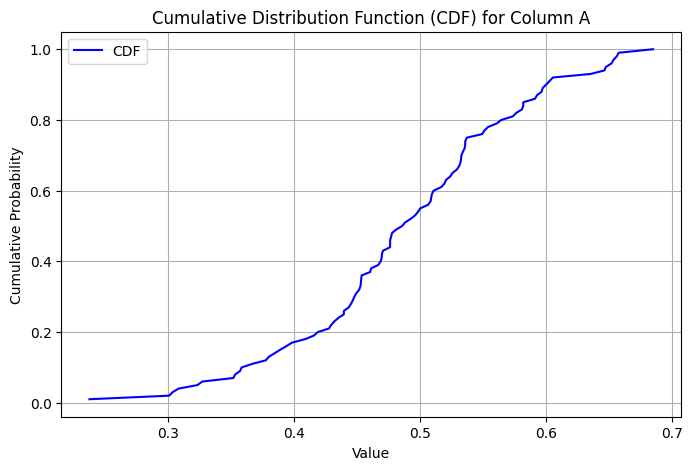

In [7]:
import matplotlib.pyplot as plt

# Extract column A
data = df['A']

# Sort the data
data_sorted = np.sort(data)

# Compute the cumulative probabilities
cdf = np.arange(1, len(data_sorted) + 1) / len(data_sorted)

# Plot the CDF
plt.figure(figsize=(8, 5))
plt.plot(data_sorted, cdf, label='CDF', color='blue')
plt.title("Cumulative Distribution Function (CDF) for Column A")
plt.xlabel("Value")
plt.ylabel("Cumulative Probability")
plt.grid()
plt.legend()
plt.show()

$$
F_X(x) = P(X \leq x) = \int_{-\infty}^x PDF(x) \, dx
$$

The CDF is useful in understanding percentiles, so it will be defined first. The equations for the CDF of x is shown to be the probability of value X being less than or equal to a value x. Using the chart above, you can see the CDF for the data from column A in our df. For example, let's say our value X is 0.4. That means that based on the CDF, the probablity of observing a value less than or equal to 0.4 is about 20%.

But what is the PDF?

$$
PDF(x) = \frac{d}{dx} CDF(x)
$$

The PDF and CDF are related. The CDF is the integral (area under the curve) of the PDF. And the PDF is the derivative (slope at a point) of the CDF. 

C:\Users\rogerree\AppData\Local\Temp\ipykernel_9328\2008931282.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['A'], shade=True, color="blue")


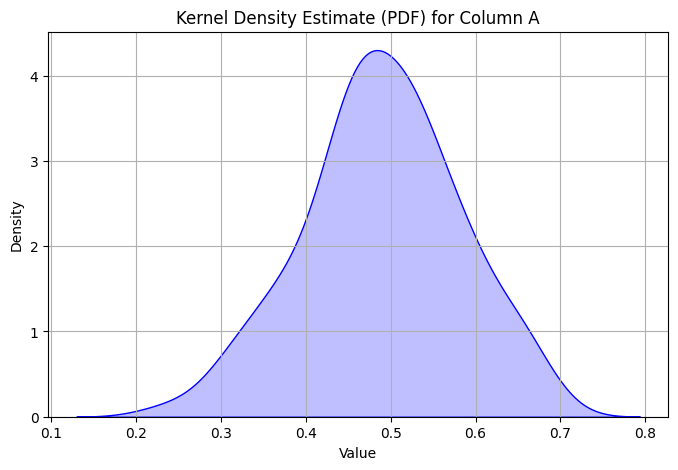

In [8]:
import seaborn as sns

# Plotting the PDF using Kernel Density Estimation (KDE)
plt.figure(figsize=(8, 5))
sns.kdeplot(df['A'], shade=True, color="blue")
plt.title("Kernel Density Estimate (PDF) for Column A")
plt.xlabel("Value")
plt.ylabel("Density")
plt.grid(True)
plt.show()


Now see here that the PDF of variable A can give us the CDF of the variable A as well. We cannot simply just use this chart to find the probablity of obverving a specific value in A. We need to figure out the area under the curve up to a specific point - which in turn gives us the CDF. Getting the intregral up to 0.6, for example, will return to us the area under the curve to that point, giving us the probablity of observing that outcome. 

$$
P(a <= X <= b) = \int_{b}^a PDF(x) \, dx = CDF(b) - CDF(a)
$$

So, what is the above equation saying? Here, we are no longer checking to see the probablity that a value is before or equal to a value x, we are checking to see the probablity that x falls between two values a and b.

From the perspective of the PDF, this now becomes the intregral from a to b. The area under the curve of the PDF function from points a to b. 

From the CDF, this simply becomes the value at point b from the CDF curve, minus the value at point a. The resulting value is the probablity that x falls between b and a. 

## Percentiles

So, with the CDF defined, the concept of percentiles becomes clear. Percentiles are just the inverse of the CDF. As an example, using the CDF to locate the amount of data that falls before 0.4. Using the CDF, we previously said that the liklihood of locating a value less than or equal to 0.4 is 20%. Therefore, taking the inverse for the percentile, we can confirm that we are looking at the 20th percentile. 

## Variance

Talking about variance, we have a sample variance and a population variance. It is key to understand that the sample variance systematically underestimates the population variance.

Sample Variance:

$$
var = \frac{\sum_{i=1}^{n} (x_i - \bar{x})^2}{n} 
$$

So why does this equation underestimate the population variance? Well, it is because of the fact that when we draw numbers out of the whole population, our sample is less likely to have outliers. Therefore, this is a biased estimator (biased because it will result in smaller estimates for the true population variance, and estimator because we are using data from a sample to make a prediction on the population).

Population Variance:

$$
var = \frac{\sum_{i=1}^{n} (x_i - \bar{x})^2}{n - 1} 
$$

Using n + 1 as the denominator will cause this to become an unbiased estimator, as it will correct the issue seen in the sample variance to force the resulting estimate for population variance to be larger. 

## Standard Deviation

$$
s = \sqrt{var} 
$$

As we can see the, the formula for standard deviation is the root of the variance. The sample standard deviation would be the root of the sample variance. This formula makes sense, as in the variance equation we are squaring the difference between each value, then getting the average of that. Thus, taking the square root of that value, we are getting the average distance between objects in our data as the standard deviation. 

In [9]:
print(np.std(df['A'],ddof=1)) # degrees of freedom is 1 by default
print(np.std(df['B']))
print(np.std(df['C']))
print(np.std(df['D']))
print(np.std(df['E']))


0.09081684280078009
0.9531002045955085
10.811123900871731
43.93435557738386
529.1830778662523


## Standard Error

It is "the estimate of the standard deviation as a coefficient". The Sample Standard Error of the Mean.

$$
SEM = \frac{s}{\sqrt{n}} 
$$

 A smaller standard error indicates that the sample mean is a more accurate estimate of the population mean. This is the value provided by the SEM. 

## Confidence Intervals (mean)

This equation is an approximation, that assume the data is symetrical and unimodal.

In the below, a is equal to the percentage confidence interval we want. So replace .8 if looking for an 80% confidence interval. 

$$
\text{CI} = mean \pm std \cdot PPF (\frac{1-a}{{2}})
$$

You could also use a z-score above. std is clearly the standard deviation, and mean is the mean. What is the PPF? That is the percentile point function: this is the inverse of the CDF. It answers the question "given a certain probability, what is the corresponding input value for the CDF?"

What is a confidence interval telling us, though?

In [10]:
from scipy import stats

mean_A = df['A'].mean()
std_A = df['A'].std(ddof=1)
n = len(df['A']) 

se_A = std_A / np.sqrt(n)

confidence_level = .95
z_score = stats.norm.ppf((1 + confidence_level) / 2)  # Critical value

margin_of_error = z_score * se_A

confidence_interval = (mean_A - margin_of_error, mean_A + margin_of_error)

print(f"Mean of column A: {mean_A}")
print(f"Standard Error of column A: {se_A}")
print(f"Margin of Error: {margin_of_error}")
print(f"Confidence Interval (95%): {confidence_interval}")

Mean of column A: 0.4896153482605905
Standard Error of column A: 0.009081684280078009
Margin of Error: 0.01779977410791647
Confidence Interval (95%): (0.47181557415267406, 0.5074151223685069)


In this case, we are saying that we are 95% confident that the true population mean of column A falls between .47 and .50. As you increase the value of a, the percentage confidence we want, the range of the interval increases. This makes sense, as if we want to be 99% confident that our mean falls between two values, these two values better be farther apart. In the case of our df, all of column A IS the population. But what if this were a sample? If it were, since we are normally distributing data around .5, and our random seed happened to generate this df with A's mean being .48, then it makes sense that we would be 95% confident that our population mean falls between those two values above. .5 does fall between them, which is what our expected population mean should be. 

What can we do with this information though? Well, we are able to now able to reflect our uncertaintity about how this sample of data reflects the population in terms of the mean. We are 95% confident that the true population mean falls between .47 and .507. Telling this to whoever is consuming our data or study lets them know that the results should be pretty acceptable, as this is a pretty narrow range. A large range with 95% confidence would tell the consumer of the data that based on the way the data is shaped and distributed (via the std and PPF) that the TRUE population mean of this data may be something a lot farther off the sample. Therefore, this calls into question the results of the analysis done on such a sample..

# <strong> Important Presentations of Probability Densities </strong>

All of the following presentations of the PDF are in terms of the height of male subjects.

## Probability Density Function (PDF)

C:\Users\rogerree\AppData\Local\Temp\ipykernel_9328\1773454949.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['A'], shade=True, color="blue")


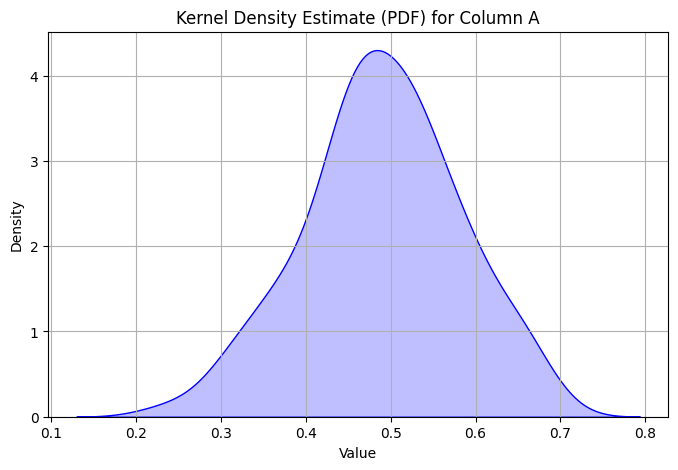

In [11]:
# Plotting the PDF using Kernel Density Estimation (KDE)
plt.figure(figsize=(8, 5))
sns.kdeplot(df['A'], shade=True, color="blue")
plt.title("Kernel Density Estimate (PDF) for Column A")
plt.xlabel("Value")
plt.ylabel("Density")
plt.grid(True)
plt.show()

In order to obtain the specific probability for a variable appearing in a certain interval (say between .3 and .7, for example), you will need to intregrate the PDF over that range (find the area under the curve at those points). 

<strong>"What is the chance that a man is between 160 and 165 cm?"</strong>

## Cummulative Distribution Function (CDF)

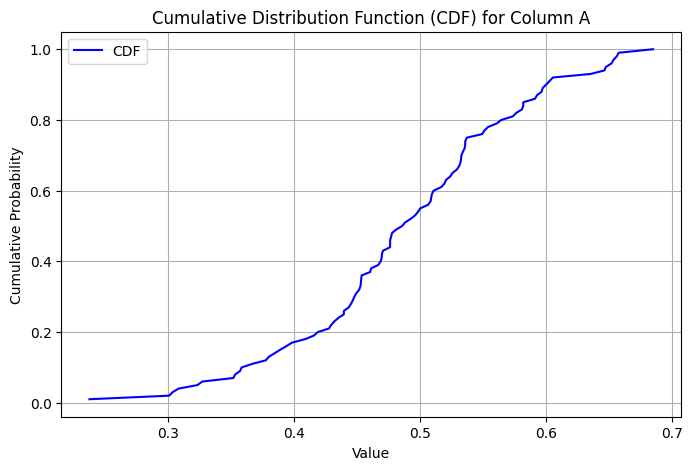

In [12]:
# Extract column A
data = df['A']

# Sort the data
data_sorted = np.sort(data)

# Compute the cumulative probabilities
cdf = np.arange(1, len(data_sorted) + 1) / len(data_sorted)

# Plot the CDF
plt.figure(figsize=(8, 5))
plt.plot(data_sorted, cdf, label='CDF', color='blue')
plt.title("Cumulative Distribution Function (CDF) for Column A")
plt.xlabel("Value")
plt.ylabel("Cumulative Probability")
plt.grid()
plt.legend()
plt.show()

As previously mentioned, the CDF is just the derivative of the PDF. It tells us what the probability is of observing a value less than or equal to a selected value. Unlike the PDF, we can just use the graph it generates to find the value we are looking for. 

<strong>"What is the chance that a man is less than 165 cm tall?"</strong>

## Survival Function

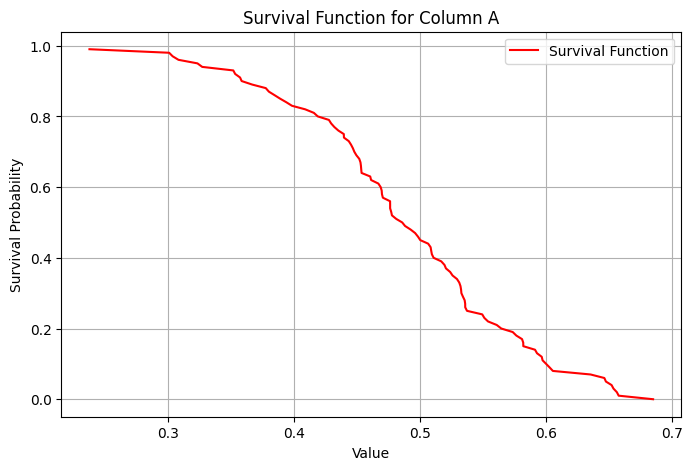

In [13]:
# Extract column A
data = df['A']

# Sort the data
data_sorted = np.sort(data)

# Compute the cumulative probabilities (CDF)
cdf = np.arange(1, len(data_sorted) + 1) / len(data_sorted)

# Calculate the survival function (1 - CDF)
survival_function = 1 - cdf

# Plot the Survival Function
plt.figure(figsize=(8, 5))
plt.plot(data_sorted, survival_function, label='Survival Function', color='red')
plt.title("Survival Function for Column A")
plt.xlabel("Value")
plt.ylabel("Survival Probability")
plt.grid()
plt.legend()
plt.show()

The survival function is the inverse of the CDF. It is the proportion of data that is "surviving" above a value. It is the probability of obtaining a value larger than a given value. 

<strong>"What is the chance that a man is larger than 165 cm?"</strong>

## Percentile Point Function 

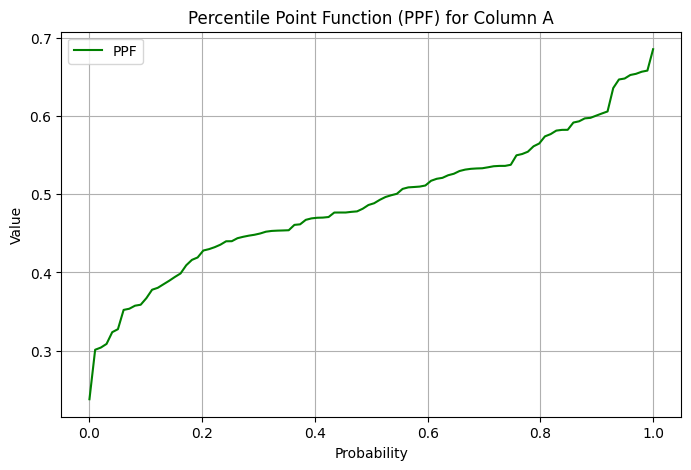

In [14]:
# Extract column A
data = df['A']

# Sort the data
data_sorted = np.sort(data)

# Define the probabilities for the quantiles
probabilities = np.linspace(0, 1, 100)

# Calculate the corresponding PPF values
ppf_values = np.percentile(data_sorted, probabilities * 100)

# Plot the Percentile Point Function (PPF)
plt.figure(figsize=(8, 5))
plt.plot(probabilities, ppf_values, label='PPF', color='green')
plt.title("Percentile Point Function (PPF) for Column A")
plt.xlabel("Probability")
plt.ylabel("Value")
plt.grid()
plt.legend()
plt.show()

We previously mentioned this when talking about the definition of a confidence interval. It is the inverse of the CDF. It answers the question: given a certain probability, what is the corresponding input value for the CDF?"

<strong>"Given that I am looking for a man who is smaller than 95% of all other men, what size does he have to be?"</strong>

## Inverse Survival Function (ISF)

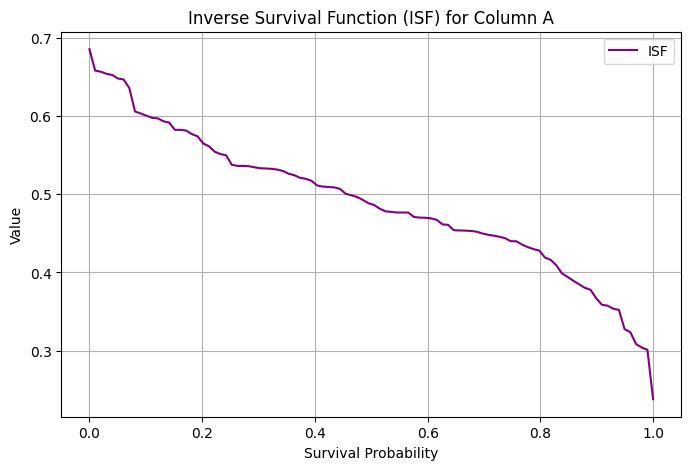

In [15]:
# Extract column A
data = df['A']

# Sort the data
data_sorted = np.sort(data)

# Define the survival probabilities
survival_probabilities = np.linspace(0, 1, 100)

# Calculate the corresponding ISF values (Inverse Survival Function)
# ISF is calculated as 1 - CDF
# Get quantiles from the sorted data
isf_values = np.percentile(data_sorted, (1 - survival_probabilities) * 100)

# Plot the Inverse Survival Function (ISF)
plt.figure(figsize=(8, 5))
plt.plot(survival_probabilities, isf_values, label='ISF', color='purple')
plt.title("Inverse Survival Function (ISF) for Column A")
plt.xlabel("Survival Probability")
plt.ylabel("Value")
plt.grid()
plt.legend()
plt.show()

The name of this function says it all: it is the inverse of the survival function. It really serves as the opposite of the PPF. 

<strong>"Given that I am looking for man who is larger than 95% of all other men, what size does the subject have to be?"</strong>

## Random Variate Sample

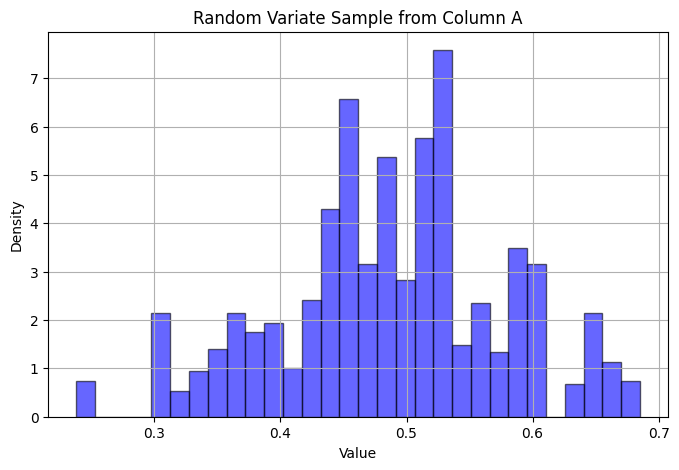

In [16]:
# Extract column A
data = df['A'].to_numpy()  # Convert to NumPy array for ease of use

# Specify the size of the random sample you want to generate
sample_size = 1000  # You can adjust this as needed

# Generate the random variate sample
random_sample = np.random.choice(data, size=sample_size, replace=True)

# Plotting the histogram of the random variate sample
plt.figure(figsize=(8, 5))
plt.hist(random_sample, bins=30, density=True, alpha=0.6, color='blue', edgecolor='black')
plt.title("Random Variate Sample from Column A")
plt.xlabel("Value")
plt.ylabel("Density")
plt.grid()
plt.show()

Random variates from a given distribution. 

# <strong> Discrete Distributions </strong>

What does discrete mean? It is refers to things you would capture that can only take on a set number of different possible values.. such as flipping a coin (heads or tails), or rolling dice.

The two frequently encountered discrete distributions are the <strong> binomial distribution </strong> and the <strong> Poisson distribution</strong>. The big difference between them: applications of the binomial distribution have an inherent upper limit (the max # of times a number can appear when rolling a dice 5 times is 5) while the Poisson distribution does not. 

## Bernoulli Distribution

The simplest case of a univariate distribution, and also the basis of the binomial distribution, is the Bernoulli distribution which only has two states. "The coin flip distribution".

It is important to note that the Bernoulli distribution models a single trial of a trial with two possible outcomes. The binomial distribution extends the Bernoulli distribution to more than one trial. It describes the number of successes in (n) independent Bernoulli trials, each with the same probability of success (p).

## Binomial Distribution

As previously mentioned, the binomial distribution models the results of n number of Bernoulli trials. "Out of a given (fixed) number of trials, how many will succeed?"

A helpful way to look at this is as follows: the binomial distribution is shown by asking a question like the following - "How many children in a given classroom will have green eyes?" If you think of every child as representing their own Bernoulli distribution, then you can begin to see how the binomial distribution extends the Bernoulli into more than one trial. 

When a random variable X has a binomial distribution with parameters p and n we write it as:

$$
X \sim \text{Binomial}(n, p)

$$

The squiggly line just means that X is distributed according to a certain probability distribution. In this case, X is distributed according to the binomial distribution.

$$

P(X = k) = \binom{n}{k} p^k (1 - p)^{n - k}



$$

What does this mean?

It is telling us the probability of observing the exact discrete outcome of k in our variable X. 

<strong>Example:</strong>
If you have a situation where:

You flip a fair coin 10 times ( n = 10 ).
You want to find the probability of getting exactly 4 heads (k = 4 ).
You would calculate P(X = 4) using the Binomial PMF: 
$$
P(X = 4) = \binom{10}{4} \left(0.5\right)^4 \left(0.5\right)^{10-4} = \binom{10}{4} \left(0.5\right)^{10} 
$$
This gives you the probability of getting exactly 4 heads in 10 flips of the coin.

Also note that the sum of all probabilities must add up to 1.

## Poisson Distribution

Similar to the binomial distribution, but in this case, we are looking at the total number times a discrete event occurs over a period of continuous space or time.

- How many pennies will I encounter on my walk home?
- How many children will be delivered at the hospital today?
- How many defects will there be per 100m of rope sold?

Instead of looking for a probability that we observe 10, 100, or 1000 pennies (p), the Poisson distribution instead has a parameter "lambda" which represents the average or expected number of events to happen in the experiment. 

$$
P(X = k) = \frac{\lambda^k e^{-\lambda}}{k!}
$$

This equation tells us the probability of obverving a set amount of pennies in our walk home, given we know the lambda.

# <strong> Normal Distribution </strong>

The normal distribution (Gaussian) is said to be the most important distribution by far. This is due to the fact that the mean values of <i> all </i> distribution functions approximate a normal distribution for large enough sample numbers. 

$$
f(x) = \frac{1}{\sigma \sqrt{2\pi}} e^{-\frac{(x - \mu)^2}{2\sigma^2}}
$$

In this case, f is the probability density function (PDF) of the normal distribution. This is the graph that one would associate with the normal distribution. This contrasts with the <strong>probability mass function (PMF) </strong>, which is defined only for discrete values. PMF = discrete, while PDF = continuous. 

Probability of being within range:

  Mean ± 1 SD:  |██████████ (68%)   

  Mean ± 2 SD:  |████████████████████████ (95%) 
  
  Mean ± 3 SD:  |████████████████████████████████████████████ (99.7%) 

The above chart assumes a perfectly normal distribution, but it still can be applied when normality is assumed. 

## Sum of Normal Distributions

The sum (or difference) of two normal distributions is also normally distributed. In other words, the variance of the sum is the sum of the variances.

## Central Limit Theorem

The central limit theorem just states that the mean of a sufficiently large number of identically distributed random variates will be approximately normally distributed. Whether this be random numbers in a range, weights of patients, cycle times of SR's: the more data we collect, the more the distribution mean will tend toward normality.

## Distributions and Hypothesis Tests

We can use the rules and power of the normal distribution to test a hypothesis. Take the following example:

"The average weight of a newborn child in the USA is 3.5 kg, with a standard deviation of 0.76 kg. If we want to check all children that are significantly different from the typical baby, what should we do with a child that is born with a weight of 2.6 kg?"

Hypothesis test: <strong>our hypothesis is that the baby comes from the population of healthy babies.</strong>

Answer?

- Find the distribution that characterizes <strong>healthy</strong> babies, which by the CLT we know is approximately normal. This distribution has mean of 3.5, and std of .76.
- Calculate the CDF at the value of interest (by taking the derivative at a point on the PDF). CDF(2.6) -> This tells us "what is the probability of observing a baby that is 2.6 kg or lighter?"

In [18]:
mu = 3.5
sigma = .76

baby_distribution = stats.norm(mu,sigma)
baby_distribution.cdf(2.6)

0.11816486815719918

- The answer to that is .118. So the probability that a healthy baby is at least .9 lighter than the average healthy (2.6 kg or less) is 11.8%.
- We know that because of the symetry of the CDF, the probability that a healthy baby is at least .9 kg heavier than the average healthy baby is also 11.8%.
- So, we are now able to say that a baby that has a weight of .9 kg off of the mean healthy baby is 23.6% likely. Due to the fact that this outcome is decently likely, we do not have the sufficient evidence to reject our null hypothesis, and our baby is regarded as healthy. 

# <strong> Continuous Distributions Derived from the Normal Distribution </strong>

There are some frequently encountered continuous distributions that are closely related to the normal distribution.

## t-Distribution

The sample distribution of mean values for samples from a normally distributed population. Typically used for small sample numbers, when the true mean/ SD are not known.

Since in most cases, the population mean and its variance are unknown, one typically works with the t-distribution when analyzing sample data.

$$
t = \frac{\bar{x} - \mu}{s / \sqrt{n}}
$$

Put simply, the t distribution is characterized by the sample mean, minus the true population mean, all divided by the standard error. 

So, this equation tells us something about how our sample relates to the actual true distribution. 

Therefore, you can see why a frequent application of the t-distribution is in the calculation of confidence intervals that caontains the true mean with a chance of 95%. 

## Chi-Square distribution 

For describing the variability of normally distributed data. 

This distribution is related to the normal distribution in a simple way: if a random variable X has a normal distribution, then X^2 has a chi-square distribution, with one degree of freedom. The sum squares of n independent and standard normal random variables have a chi-squre distribution with n degrees of freedom. 

What is important to know is that the Chi-Square distribution measures the goodness of fit of an observed distribution to a theoretical one. If a pill producer took in a sample of 13 pills with certain weights, and wanted to know whether or not the standard deviation is larger than allowed, he could use the Chi-Square distribution. We will be able to obtain the liklihood of obtaining a chi-squared value as larger or larger than the one we obverved in out test scenario, telling us how out of the ordinary our sample is. 

## F-distribution

For comparing variabilities of two sets of normally distributed data. 

What if we want to know if two groups have the same variance? We first need to calculate the ratio of the sample standard deviations squared:

$$
F = \frac{S^2_x}{S^2_y}
$$

Where S_x is the sample standard deviation of the first sample, and S_y is the sample standard deviation of the second sample. 

The distribution of the above statistic is the <i>F-Distribution</i>. 

For applications in ANOVA's, the cutoff values for an F distribution are generally found using three variables:
- ANOVA numerator degrees of freedom
- ANOVA denominator degrees of freedom
- significance level

An ANOVA compares the size of the variance between two different samples. This is done by dividing the larger variance by the smaller variance. The formula for the resulting F statistic is:

$$
F(R,r) = \frac{X^2_R / R}{X^2_r / r}
$$

In other words, F statistic describing the size of variance in two samples is given by the larger variance (seen by the chi-squared statistic in sample 1) divided by the degrees of freedom of that sample.. divided by the exact same thing but for sample 2. 

# <strong>Other Continuous Distributions </strong>